#CP468 Artificial Intelligence Project

**Name:**
- Tommy Odetunde - 170193570
- Kevin He - 181803930

**Date:** July 19, 2022

In [1]:
import pandas as pd
from sklearn import preprocessing # Data Preprocessing before model training
from sklearn.model_selection import train_test_split # Splitting Dataset into Training and Testing
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.svm import SVC # Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbour
from sklearn import metrics # Metrics for Accuracy, Precision, and F1 Score

## 1) Import Data

In [2]:
dataset = pd.read_csv("penguins.csv")

## 2) Understand the Data

In [3]:
dataset.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
print("Number of rows in dataset:", len(dataset.index))

Number of rows in dataset: 344


## 3) Data Preprocessing
 - Dropped rows that are NA/NaN
 - Encode columns that have strings for values to integers

### Drop rows that are NA/NaN

In [5]:
datasetPP = dataset.dropna()
print("Number of rows in dataset after preprocessing:", len(dataset.index))

Number of rows in dataset after preprocessing: 344


In [6]:
datasetPP

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### Encode Columns
- Since the algorithms cannot process string-valued data, the data has to be encoded from strings to integers in-order for the data to be used for training

In [7]:
def print_classes(p_class):
  for i, data in enumerate(p_class):
    print("Index:", i, ",", "Value:",data)
  print()
  return

In [8]:
#creating labelEncoder
le_sex = preprocessing.LabelEncoder()
sex_encoded = le_sex.fit_transform(datasetPP["sex"])
print_classes(le_sex.classes_)

le_island = preprocessing.LabelEncoder()
island_encoded = le_island.fit_transform(datasetPP["island"])
print_classes(le_island.classes_)

Index: 0 , Value: female
Index: 1 , Value: male

Index: 0 , Value: Biscoe
Index: 1 , Value: Dream
Index: 2 , Value: Torgersen



In [9]:
#datasetPP = datasetPP.assign(sex_encoded=sex_encoded)
#datasetPP = datasetPP.assign(island_encoded=island_encoded)

print("Number of rows in dataset after preprocessing:", len(datasetPP.index))

Number of rows in dataset after preprocessing: 333


In [10]:
datasetPP

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## 4) Selecting Features for Model Training
- Before we train our model, we must choose the features that we want the model recognize and train with
- We select the features that are most important to help classify our labels

In [11]:
# Obtain the column name list
datasetList = datasetPP.columns.tolist()

feature_cols = ['bill_length_mm','bill_depth_mm',
                'flipper_length_mm','body_mass_g']
X = datasetPP[feature_cols]
y = datasetPP["species"]

## 5) Generate Train and Verification Sets
 - Splitting dataset into 70% training, and 30% testing 

In [13]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2) # 70% training and 30% test

189       Gentoo
60        Adelie
5         Adelie
315    Chinstrap
199       Gentoo
         ...    
310    Chinstrap
27        Adelie
78        Adelie
20        Adelie
174       Gentoo
Name: species, Length: 233, dtype: object

## 6) Train and Test Models



In [15]:
# Random Forest Classifier
rfc = RandomForestClassifier()

# Train Model
rfc.fit(X_train, y_train)

# Test Model
y_pred_rfc = rfc.predict(X_test)

In [17]:
# Support Vector Machine/Classifier
svc = SVC(kernel='linear')

# Train Model
svc.fit(X_train, y_train)

# Test Model
y_pred_svc = svc.predict(X_test)

In [26]:
# K-Nearest Neighbours
knn = KNeighborsClassifier(n_neighbors=1)

# Train Model
knn.fit(X_train, y_train)

# Test Model
y_pred_knn = knn.predict(X_test)

## 7) Evaluate Results

In [28]:
print("Machine Learning Algorithm: Random Forest Classifier")
print()
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rfc))
print("Precision:",metrics.precision_score(y_test, y_pred_rfc, average="micro"))
print("F1 Score:",metrics.precision_score(y_test, y_pred_svc, average="micro"))
print()
print(metrics.classification_report(y_test, y_pred_rfc))

Machine Learning Algorithm: Random Forest Classifier

Accuracy: 0.99
Precision: 0.99
F1 Score: 0.98

              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        42
   Chinstrap       0.95      1.00      0.97        19
      Gentoo       1.00      1.00      1.00        39

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [29]:
print("Machine Learning Algorithm: Support Vector Machine/Classifier")
print()
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svc))
print("Precision:",metrics.precision_score(y_test, y_pred_svc, average="micro"))
print("F1 Score:",metrics.precision_score(y_test, y_pred_svc, average="micro"))
print()
print(metrics.classification_report(y_test, y_pred_svc))

Machine Learning Algorithm: Support Vector Machine/Classifier

Accuracy: 0.98
Precision: 0.98
F1 Score: 0.98

              precision    recall  f1-score   support

      Adelie       1.00      0.95      0.98        42
   Chinstrap       0.90      1.00      0.95        19
      Gentoo       1.00      1.00      1.00        39

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [32]:
print("Machine Learning Algorithm: K-Nearest Neighbour")
print()
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:",metrics.precision_score(y_test, y_pred_knn, average="micro"))
print("F1 Score:",metrics.precision_score(y_test, y_pred_svc, average="micro"))
print()
print(metrics.classification_report(y_test, y_pred_knn))

Machine Learning Algorithm: K-Nearest Neighbour

Accuracy: 0.89
Precision: 0.89
F1 Score: 0.98

              precision    recall  f1-score   support

      Adelie       0.86      0.90      0.88        42
   Chinstrap       0.75      0.79      0.77        19
      Gentoo       1.00      0.92      0.96        39

    accuracy                           0.89       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.90      0.89      0.89       100



In [33]:
## References to help with project
# https://www.datacamp.com/tutorial/decision-tree-classification-python #Decision Tree
# https://www.datacamp.com/tutorial/naive-bayes-scikit-learn #Naive Bayes
# https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn #KNN

  species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0  Adelie            39.1           18.7              181.0       3750.0
1  Adelie            39.5           17.4              186.0       3800.0
2  Adelie            40.3           18.0              195.0       3250.0
4  Adelie            36.7           19.3              193.0       3450.0
5  Adelie            39.3           20.6              190.0       3650.0


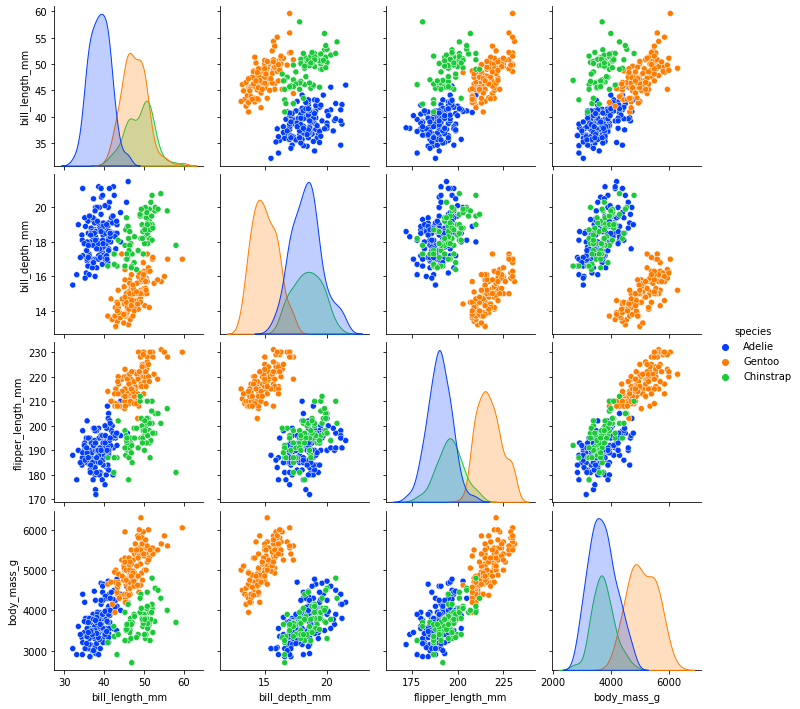

In [38]:
import seaborn as sns
feature_cols = ['species','bill_length_mm','bill_depth_mm',
                'flipper_length_mm','body_mass_g']
snsData = datasetPP[feature_cols]
print(snsData.head())
snsy = snsData.species
snsX = snsData.drop('species',axis=1)
#bill_length_mm 	bill_depth_mm 	flipper_length_mm 	body_mass_g

sns.pairplot(snsData, hue="species",palette="bright")

  species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie            39.1           18.7              181.0       3750.0   
1  Adelie            39.5           17.4              186.0       3800.0   
2  Adelie            40.3           18.0              195.0       3250.0   
4  Adelie            36.7           19.3              193.0       3450.0   
5  Adelie            39.3           20.6              190.0       3650.0   

   year  sex_encoded  island_encoded  
0  2007            1               2  
1  2007            0               2  
2  2007            0               2  
4  2007            0               2  
5  2007            1               2  


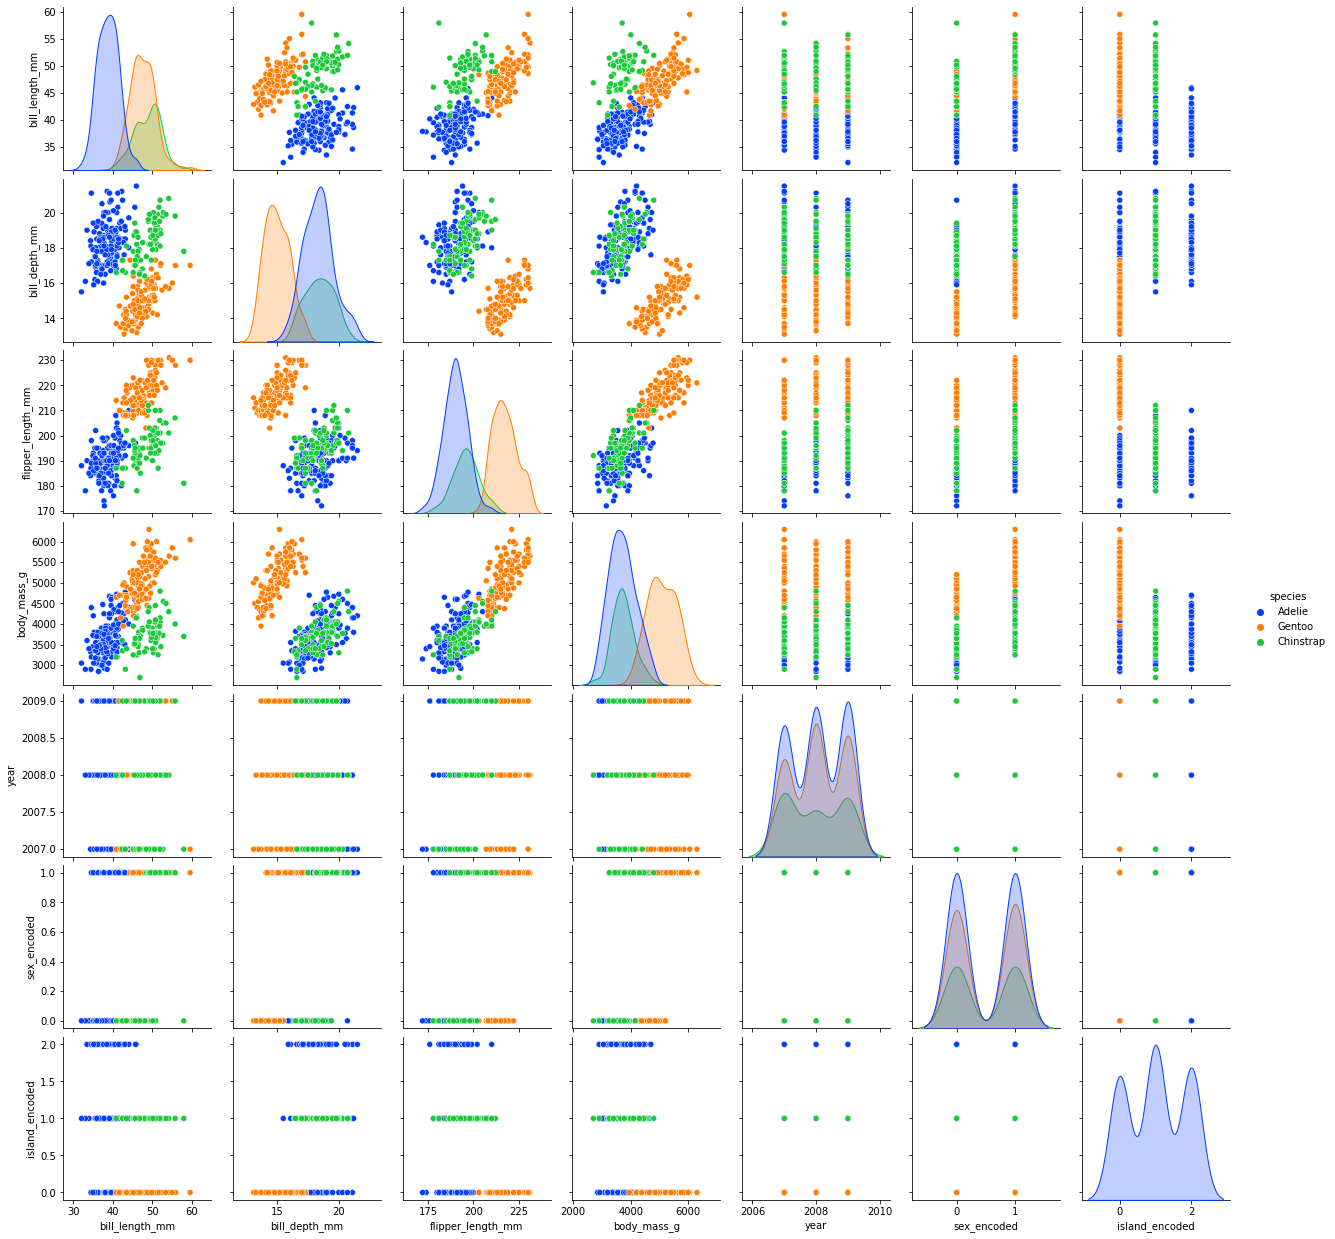

In [41]:
datasetPP = datasetPP.assign(sex_encoded=sex_encoded)
datasetPP = datasetPP.assign(island_encoded=island_encoded)

features = ["species",  "bill_length_mm",  "bill_depth_mm",  "flipper_length_mm", 'body_mass_g',  'year',  'sex_encoded',  'island_encoded']

snsData = datasetPP[features]
print(snsData.head())
snsy = snsData.species
snsX = snsData.drop('species',axis=1)
#bill_length_mm 	bill_depth_mm 	flipper_length_mm 	body_mass_g

sns.pairplot(snsData, hue="species",palette="bright")